In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digit.data.shape)
digit.data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
print(len(digit.feature_names))
digit.feature_names

64


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [5]:
print(digit.images.shape)
digit.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
print(digit.target.shape)
digit.target[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
print(digit.target_names.shape)
digit.target_names

(10,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 640x480 with 0 Axes>

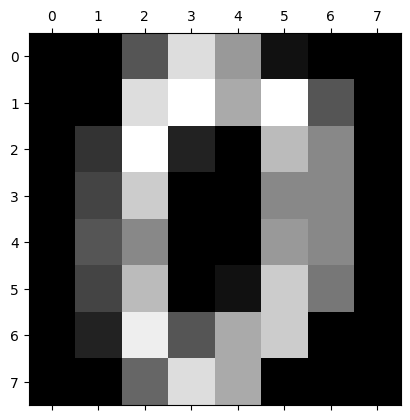

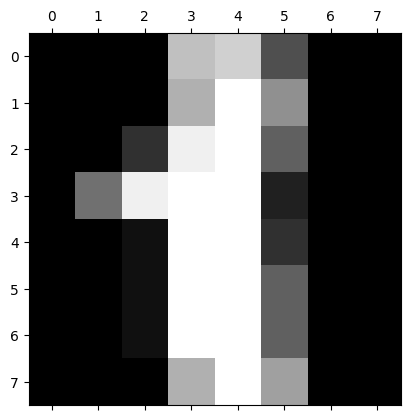

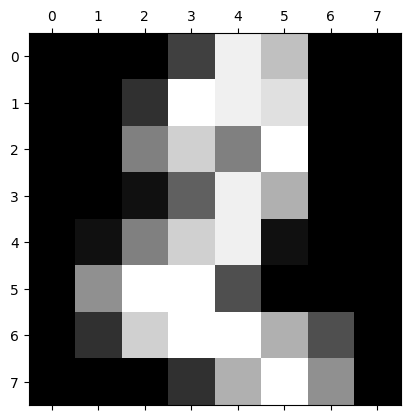

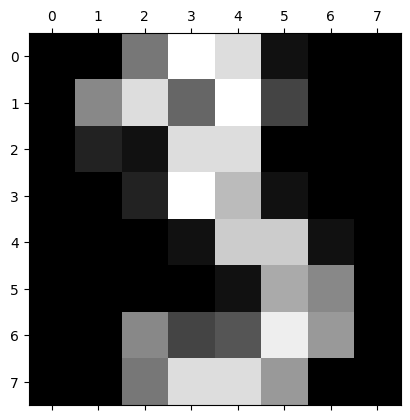

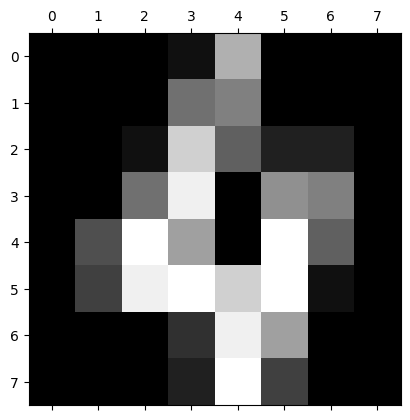

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(digit.images[i])

In [9]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(digit.data,columns=digit.feature_names)
df['target'] = digit.target
df['target_names'] = df.target.apply(lambda x:digit.target_names[x])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9,9


In [10]:
X = digit.data
Y = digit.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.6,random_state=0)

In [11]:
LoR = LogisticRegression()
LoR.fit(X_train,Y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
Yp_train = LoR.predict(X_train)
Yp_train_pro = LoR.predict_proba(X_train)
print(Yp_train_pro[1])
print(Yp_train[1])
print(Y_train[1])
print()
Yp_test = LoR.predict(X_test)
Yp_test_pro = LoR.predict_proba(X_test)
print(Yp_test_pro[1])
print(Yp_test[1])
print(Y_test[1])

[2.89587217e-11 2.36226707e-13 2.75184231e-14 3.00098248e-07
 2.46253149e-13 9.99999669e-01 6.96855146e-15 1.19564161e-14
 3.37924704e-11 3.07903787e-08]
5
5

[4.09895017e-08 5.38541380e-06 8.27486569e-06 1.64112017e-11
 4.66617533e-03 9.07186195e-06 2.54399232e-07 1.35390633e-09
 9.95310595e-01 2.00888662e-07]
8
8


[[60  0  0  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  1  0  2  1]
 [ 0  1 67  2  0  0  0  0  1  0]
 [ 0  0  0 68  0  1  0  0  1  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  1  0  0  0 84  1  1  0  2]
 [ 0  1  0  0  0  1 74  0  0  0]
 [ 0  0  0  0  1  0  0 64  0  0]
 [ 0  3  0  1  1  0  0  0 70  3]
 [ 1  2  0  0  0  1  0  0  0 70]]


Text(45.722222222222214, 0.5, 'ACTUAL')

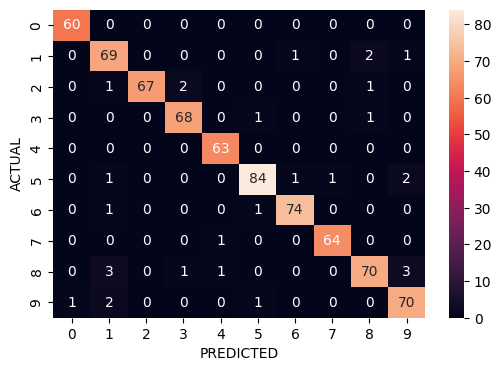

In [13]:
cm = confusion_matrix(Y_test,Yp_test)
print(cm)

plt.figure(figsize=(6,4))
sn.heatmap(data=cm, annot=True)
plt.xlabel('PREDICTED',fontsize=10)
plt.ylabel('ACTUAL',fontsize=10)